In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..')))
os.chdir('..')
from data.DataObject import DataObject
from data.Region import Region

### Instantiate classes

In [2]:
do = DataObject()
rg = Region()

### Atomic Map HDU and WCS

In [3]:
atomic_data_hdu = do.get_atomic_map_hdu()
atomic_data_wcs = do.get_atomic_map_wcs()

### CO Map HDU and WCS

In [4]:
co_data_hdu = do.get_co_map_hdu()
co_data_wcs = do.get_co_map_wcs()

#### Star coordinates on Atomic Map

In [5]:
atomic_rsg_i_component, atomic_rsg_j_component = do.stars_on_gas_map_array(hdu=atomic_data_hdu, star_type='RSGs', map_type='Atomic')
rsgs_on_atomic_map = atomic_data_hdu.data[atomic_rsg_i_component, atomic_rsg_j_component]

atomic_wr_i_component, atomic_wr_j_component = do.stars_on_gas_map_array(hdu=atomic_data_hdu, star_type='WRs', map_type='Atomic')
wrs_on_atomic_map = atomic_data_hdu.data[atomic_wr_i_component, atomic_wr_j_component]

atomic_snr_i_component, atomic_snr_j_component = do.stars_on_gas_map_array(hdu=atomic_data_hdu, star_type='SNRs', map_type='Atomic')
snrs_on_atomic_map = atomic_data_hdu.data[atomic_snr_i_component, atomic_snr_j_component]

In [6]:
### RSG LogLum > 4.7
atomic_rsg_i_component_gt_4_7, atomic_rsg_j_component_gt_4_7 = do.stars_on_gas_map_array(hdu=atomic_data_hdu, star_type='RSGs', map_type='Atomic',
                                                                                        min_loglum=0, max_loglum = 4.7)
atomic_rsg_stars_loglum_gt_4_7 = atomic_data_hdu.data[atomic_rsg_i_component_gt_4_7, atomic_rsg_j_component_gt_4_7]



#### Star coordinates on CO Map

In [7]:
co_rsg_i_component, co_rsg_j_component = do.stars_on_gas_map_array(hdu=co_data_hdu, star_type='RSGs', map_type='CO')
rsgs_on_co_map = co_data_hdu.data[co_rsg_i_component, co_rsg_j_component]

co_wr_i_component, co_wr_j_component = do.stars_on_gas_map_array(hdu=co_data_hdu, star_type='WRs', map_type='CO')
wrs_on_co_map = co_data_hdu.data[co_wr_i_component, co_wr_j_component]

co_snr_i_component, co_snr_j_component = do.stars_on_gas_map_array(hdu=co_data_hdu, star_type='SNRs', map_type='CO')
snrs_on_co_map = co_data_hdu.data[co_snr_i_component, co_snr_j_component]

In [8]:
### RSG LogLum <= 4.7
co_rsg_i_component_gt_4_7, co_rsg_j_component_gt_4_7 = do.stars_on_gas_map_array(hdu=co_data_hdu, star_type='RSGs', map_type='CO',
                                                                                        min_loglum=0, max_loglum=4.7)
co_rsg_stars_loglum_gt_4_7 = co_data_hdu.data[co_rsg_i_component_gt_4_7, co_rsg_j_component_gt_4_7]



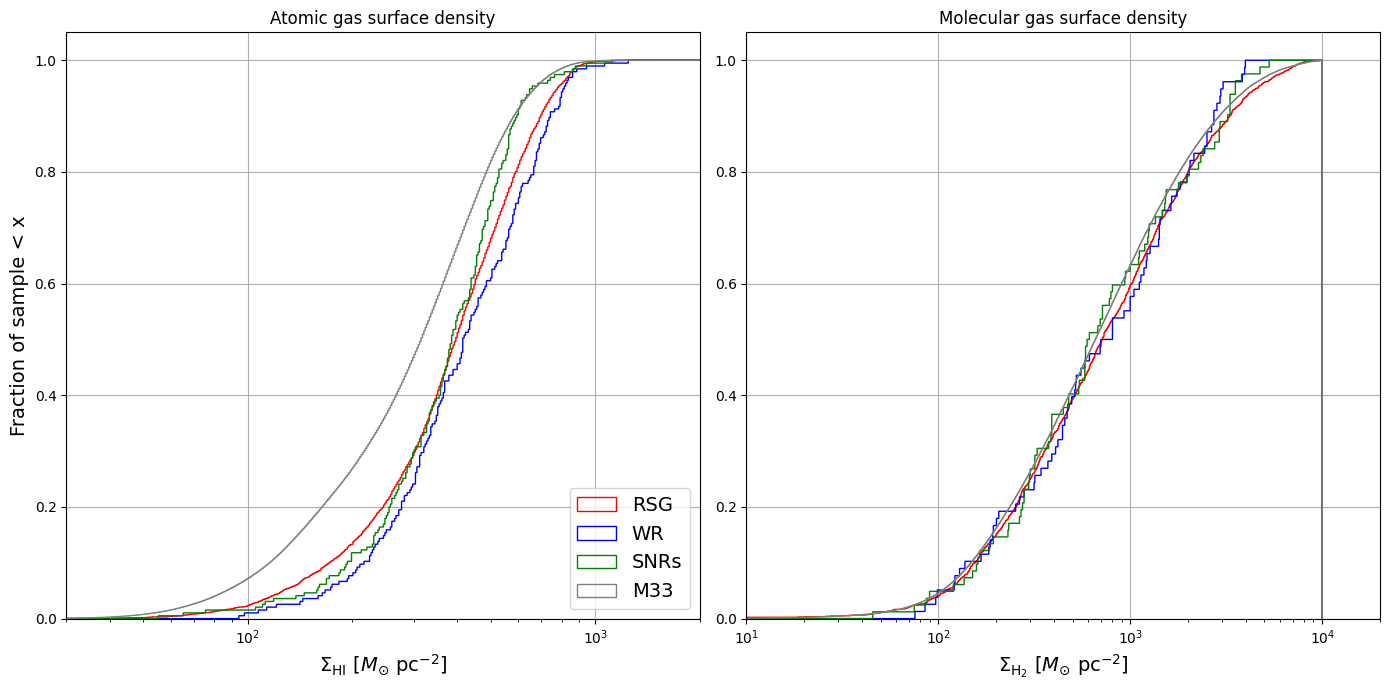

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots, one for each histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First subplot: Atomic gas surface density
ax1.hist(
    rsgs_on_atomic_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="RSG",
    color='red'
)
ax1.hist(
    wrs_on_atomic_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="WR",
    color='blue'
)
ax1.hist(
    snrs_on_atomic_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="SNRs",
    color='green'
)
ax1.hist(
    atomic_data_hdu.data.flatten(),
    bins=np.logspace(0, 4, 1000),
    histtype="step",
    cumulative=True,
    density=True,
    label="M33",
    color='grey'
)
ax1.set_xscale("log")
ax1.set_xlabel("$\Sigma_{\mathrm{HI}} \ [M_{\odot} \ \mathrm{pc}^{-2}]$", fontsize=14)
ax1.set_ylabel("Fraction of sample < x", fontsize=14)
ax1.set_title("Atomic gas surface density")
ax1.set_xlim(30, 2000)
ax1.legend(loc="lower right", fontsize=14)
ax1.grid()

# Second subplot: CO gas surface density
ax2.hist(
    rsgs_on_co_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="RSG",
    color='red'
)
ax2.hist(
    wrs_on_co_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="WR",
    color='blue'
)
ax2.hist(
    snrs_on_co_map,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="SNRs",
    color='green'
)
ax2.hist(
    co_data_hdu.data.flatten(),
    bins=np.logspace(0, 4, 1000),
    histtype="step",
    cumulative=True,
    density=True,
    label="M33",
    color='grey'
)
ax2.set_xscale("log")
ax2.set_xlabel("$\Sigma_{\mathrm{H_2}} \ [M_{\odot} \ \mathrm{pc}^{-2}]$", fontsize=14)
ax2.set_title("Molecular gas surface density")
ax2.set_xlim(10, 20000)
ax2.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


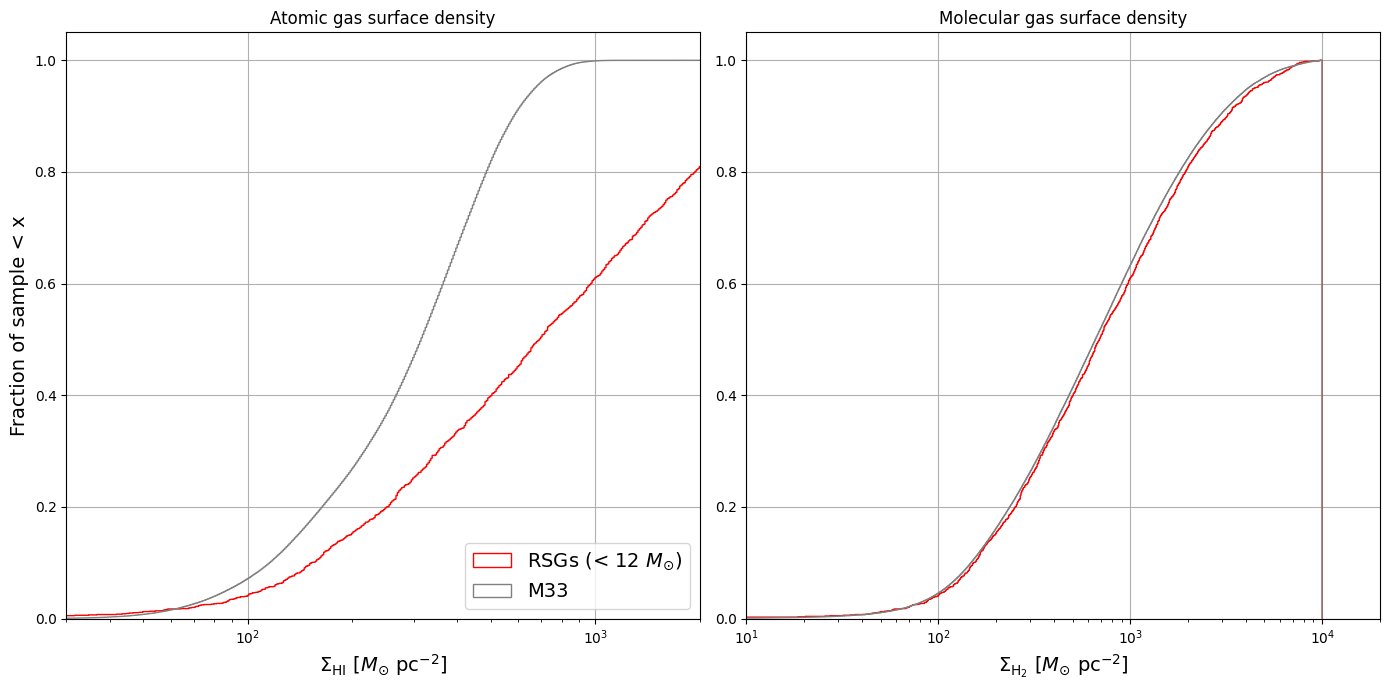

In [13]:
# Create a figure with two subplots, one for each histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First subplot: Atomic gas surface density
ax1.hist(
    co_rsg_stars_loglum_gt_4_7,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="RSGs (< 12 $M_{\\odot}$)",
    color='red'
)
ax1.hist(
    atomic_data_hdu.data.flatten(),
    bins=np.logspace(0, 4, 1000),
    histtype="step",
    cumulative=True,
    density=True,
    label="M33",
    color='grey'
)
ax1.set_xscale("log")
ax1.set_xlabel("$\Sigma_{\mathrm{HI}} \ [M_{\odot} \ \mathrm{pc}^{-2}]$", fontsize=14)
ax1.set_ylabel("Fraction of sample < x", fontsize=14)
ax1.set_title("Atomic gas surface density")
ax1.set_xlim(30, 2000)
ax1.legend(loc="lower right", fontsize=14)
ax1.grid()

# Second subplot: CO gas surface density
ax2.hist(
    co_rsg_stars_loglum_gt_4_7,
    bins=np.logspace(0, 4, 1000),
    zorder=2,
    histtype="step",
    cumulative=True,
    density=True,
    label="RSGs (< 12 $M_{\\odot}$)",
    color='red'
)
ax2.hist(
    co_data_hdu.data.flatten(),
    bins=np.logspace(0, 4, 1000),
    histtype="step",
    cumulative=True,
    density=True,
    label="M33",
    color='grey'
)
ax2.set_xscale("log")
ax2.set_xlabel("$\Sigma_{\mathrm{H_2}} \ [M_{\odot} \ \mathrm{pc}^{-2}]$", fontsize=14)
ax2.set_title("Molecular gas surface density")
ax2.set_xlim(10, 20000)
ax2.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
